In [1]:
import fileinput
from glob import glob
import sys
sys.path.append('../')

from seqlearn.datasets import load_conll
from seqlearn.evaluation import bio_f_score
from hmm import HMM
from sklearn.metrics import accuracy_score


def features(sentence, i):
    """Features for i'th token in sentence.
    Currently baseline named-entity recognition features, but these can
    easily be changed to do POS tagging or chunking.
    """

    word = sentence[i]

    yield "word:{}" + word.lower()

    if word[0].isupper():
        yield "CAP"

    if i > 0:
        yield "word-1:{}" + sentence[i - 1].lower()
        if i > 1:
            yield "word-2:{}" + sentence[i - 2].lower()
    if i + 1 < len(sentence):
        yield "word+1:{}" + sentence[i + 1].lower()
        if i + 2 < len(sentence):
            yield "word+2:{}" + sentence[i + 2].lower()


def describe(X, lengths):
    print("{0} sequences, {1} tokens.".format(len(lengths), X.shape[0]))


def load_data():
    files = glob('nerdata/*.bio')

    # 80% training, 20% test
    print("Loading training data...", end=" ")
    train_files = [f for i, f in enumerate(files) if i % 5 != 0]
    train = load_conll(fileinput.input(train_files), features)
    X_train, _, lengths_train = train
    describe(X_train, lengths_train)

    print("Loading test data...", end=" ")
    test_files = [f for i, f in enumerate(files) if i % 5 == 0]
    test = load_conll(fileinput.input(test_files), features)
    X_test, _, lengths_test = test
    describe(X_test, lengths_test)

    return train, test


if __name__ == "__main__":
    print(__doc__)

    #print("Loading training data...", end=" ")
    #X_train, y_train, lengths_train = load_conll(sys.argv[1], features)
    #describe(X_train, lengths_train)

    train, test = load_data()
    X_train, y_train, lengths_train = train
    X_test, y_test, lengths_test = test

    #print("Loading test data...", end=" ")
    #X_test, y_test, lengths_test = load_conll(sys.argv[2], features)
    #describe(X_test, lengths_test)
    describe(X_train, lengths_train)
    print(lengths_train)
    clf = HMM()
    print("Training %s" % clf)
    sum = 0
    for i in lengths_train:
        clf.fit(X_train[0:sum+i], y_train[0:sum+i])
        sum = sum + i

        y_pred = clf.predict(X_test)
        print("Accuracy: %.3f" % (100 * accuracy_score(y_test, y_pred)))
        print("CoNLL F1: %.3f" % (100 * bio_f_score(y_test, y_pred)))

Automatically created module for IPython interactive environment
Loading training data... 78 sequences, 147953 tokens.
Loading test data... 19 sequences, 34529 tokens.
78 sequences, 147953 tokens.
[2283  757 3129  777 2759 2283  821 1518 1402  633  829 3221 1648  249
 2014  587 1429 2079 1983  931 2845 2033 2116 2079 2158  994 2069 1849
 2788 1892 2790 2024 2721 2469 1917 2715 1587 1743 2551 1611  859 1951
 2964 2065 2156 1945 1898 2107 2094 2183 2039 2964 2142 1846 1847 2076
 2112 1946 1461 2141 1650  620 3124 1483 2594 2612 2239 1450  849 1881
 2293 1745 2212 2213 1795  757  463 2894]
Training <hmm.HMM object at 0x1a1857c048>


../hmm.py:59: RuntimeWarning: invalid value encountered in log
  feature_prob = np.log(safe_sparse_dot(Y.T, X) + rate)
/Users/ericstarrk/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy: 2.346
CoNLL F1: 4.098
Accuracy

In [97]:
import sys
sys.path.append('../')
from hmm import HMM
# from hmm_stream import HMMStream
import pandas as pd
import string
import numpy as np

def getData():
    data = pd.read_csv("words.csv")
    alphabet_dict = dict(zip(string.ascii_lowercase, range(1,27)))
    reverse_dict = dict(zip(range(1,27), string.ascii_lowercase))
    X = []
    Y = []
    for index, row in data.iterrows():
        w_class = 4
        singular = row[0]
        plural = row[1]
        singular_without_end = singular[:len(singular)-1]
        #append -es cases
        if (plural == singular + 'es'):
            w_class = 2
        #simply append -s cases
        elif (plural == singular + 's'):
            w_class = 1
        #endings with -y
        elif ((len(singular) > 1) and (plural == singular_without_end + 'ies')): # y -> ies
            w_class = 3
        elif (plural == singular):
            w_class = 0
        if (w_class != 4):
            word_int = []
            plural_int = []
            for let in singular:
                new_let = [0] * 26
                new_let[alphabet_dict[let] - 1] = 1
                word_int.extend(new_let)
            X.append(word_int)
            Y.append(w_class)

    padded_X = np.zeros([len(X), len(max(X, key = lambda x: len(x)))])
    for i, j in enumerate(X):
        padded_X[i][0:len(j)] = j
    words_int = np.column_stack((padded_X, Y))
    pd.DataFrame(words_int).to_csv("words_int.csv",index=False,sep=',')
    return padded_X, Y

padded_X, Y = getData()
train_X = padded_X[:10000]
train_Y = Y[:10000]
test_X = padded_X[10000:]
test_Y = Y[10000:]
clf = HMM()
clf.fit(train_X, train_Y)
accuracy = clf.score(test_X, test_Y)
print('accuracy: ', accuracy)



accuracy:  0.7561030741410488


In [107]:
from numpy import *
from sklearn.metrics import accuracy_score
from scipy.misc import logsumexp
from sklearn.externals import six
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import safe_sparse_dot

from util import atleast2d_or_csr, count_trans, validate_lengths

from skmultiflow.core.base import StreamModel
from skmultiflow.utils.data_structures import InstanceWindow
from hmm import HMM
from sklearn.tree import DecisionTreeClassifier

class HMMStream:

    def __init__(self, window_size=100, max_models=100, delay=1):
        self.H = []
        self.h = None
        # TODO
        
        self.counter = 0
        self.window_size = window_size
        self.max_models = max_models
        self.window = InstanceWindow(window_size)
        self.delay = delay
        self.delay_counter = 0
        
    def partial_fit(self, X, y = None, classes=None):
        ''' partial_fit
        
        Update the HMM with new X, y

                Parameters
        ----------
        X: Array-like
            The feature's matrix.

        y: Array-like
            The class labels for all samples in X.

        classes: list, optional
            A list with all the possible labels of the classification problem.

        Returns
        -------
        HMM
            self

        '''
        print("start fit")
        N, D = X.shape;
        
        for i in range(N):
            
            self.window.add_element(np.asarray([X[i]]), np.asarray([[y[i]]]))
            self.counter += 1
            if (self.h) is None:
                self.h = HMM()

            # fit the new model if window_size is sufficient
            if self.counter == self.window_size:
                X_iter = self.window.get_attributes_matrix()
                y_iter = self.window.get_targets_matrix()
                self.h.fit(X_iter, y_iter)
                self.counter=0
                
                # remove the most ancient model if the model_size is over than max_models
                if(len(self.H) == self.max_models):
                    self.H.pop(0)
                self.H.append(self.h)
        print("end fit")
        return self
    
    def predict(self, X):
        """ predict
        
        Predict expected y of given X        

        Parameters
        ----------
        X: Array like
            The feature's matrix.
        
        Returns
        -------
        list
            A list containing the predicted labels for all instances in X.
        
        """
        print("start predict")
        N, D = X.shape
        res = zeros(len(self.H)) 
        
        print("len of H:",len(self.H))
        for i in range(len(res)):
            res[i] = self.H[i].predict(X)
        print("end predict")
        return res
    def get_info(self):
        return 'Hidden Markov Model Streamming'

<IPython.core.display.Javascript object>


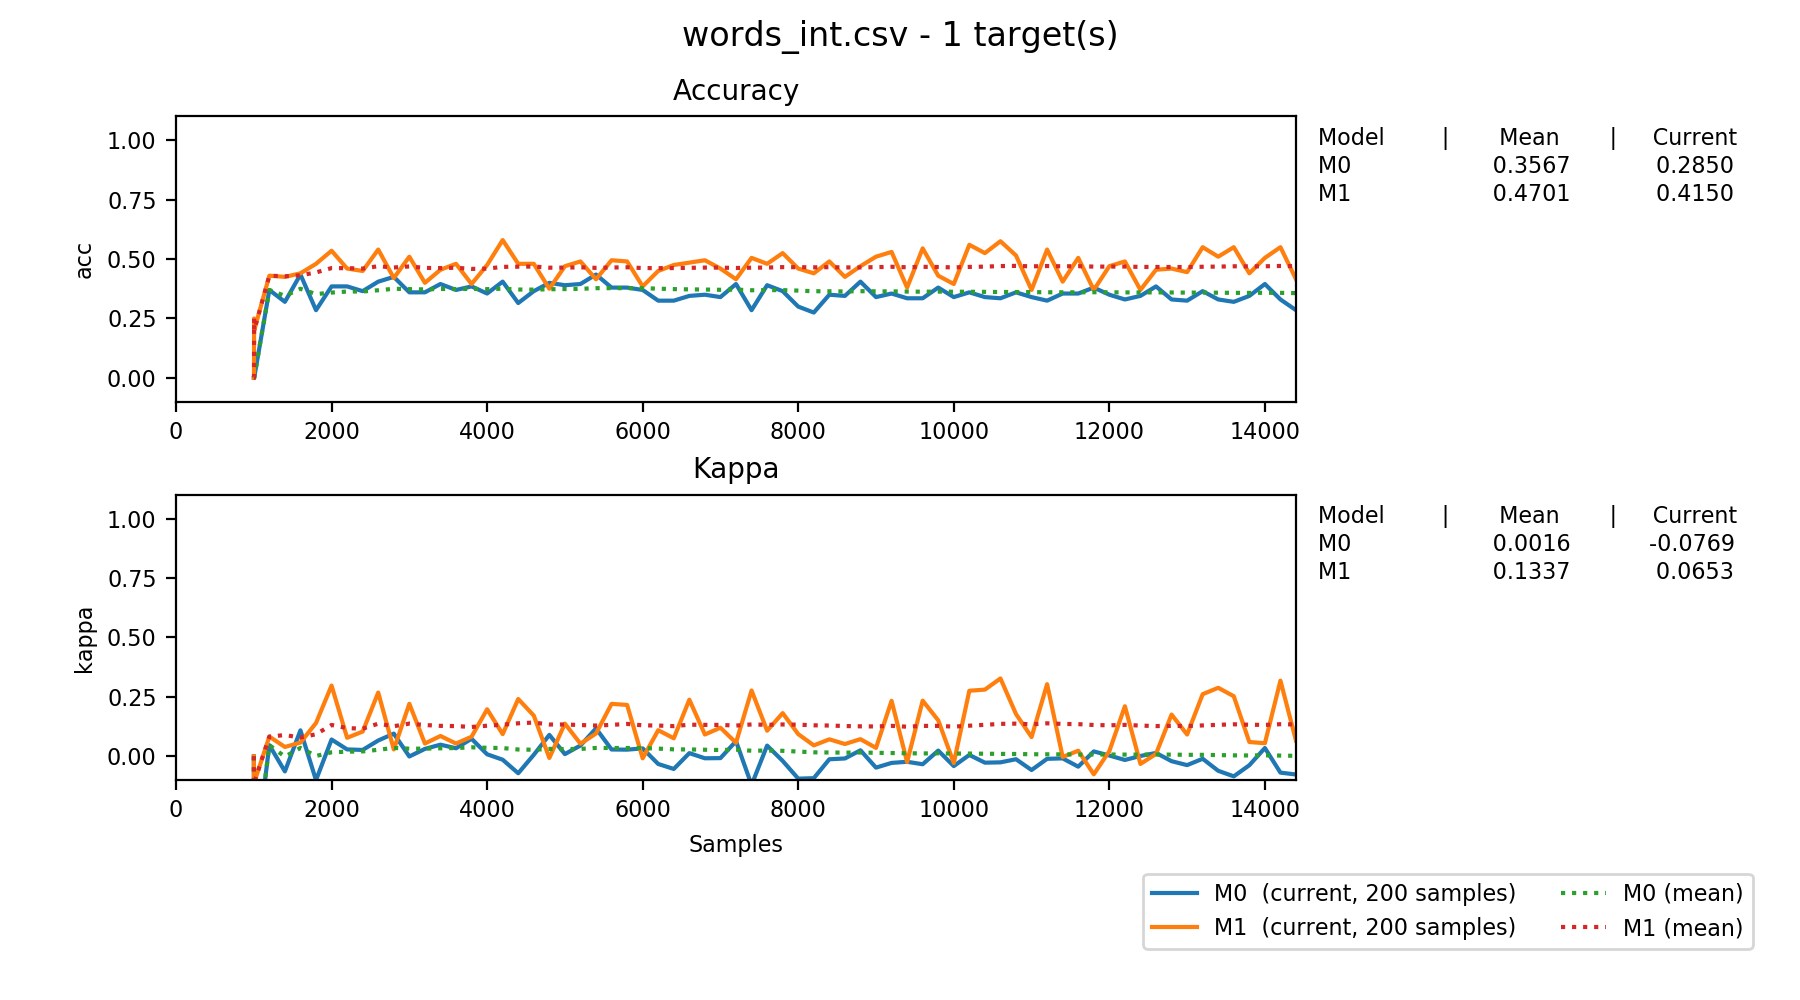

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
start fit
end fit
Evaluating...
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end predict
start fit
end fit
start predict
len of H: 10
end pre

end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
start predict
len of H: 11
end predict
start fit
end fit
s

start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict
len of H: 13
end predict
start fit
end fit
start predict

end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 14
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H: 15
end predict
start fit
end fit
start predict
len of H:

start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict
len of H: 16
end predict
start fit
end fit
start predict

start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end predict
start fit
end fit
start predict
len of H: 18
end 

end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H: 19
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H: 21
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
start predict
len of H: 22
end predict
start fit
end fit
s

start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict
len of H: 24
end predict
start fit
end fit
start predict

start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end predict
start fit
end fit
start predict
len of H: 26
end 

end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
start predict
len of H: 27
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
start predict
len of H: 29
end predict
start fit
end fit
s

end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H: 30
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H: 32
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 33
end predict
start fit
end fit
start predict
len of H: 34
end predict
start fit
end fit
start predict
len of H: 34
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
start predict
len of H: 35
end predict
start fit
end fit
s

end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H: 37
end predict
start fit
end fit
start predict
len of H:

start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end predict
start fit
end fit
start predict
len of H: 38
end 

end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H: 40
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
start predict
len of H: 41
end predict
start fit
end fit
s

 ######-------------- [30%] [19.92s]start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end predict
start fit
end fit
start predict
len of H: 43
end pre

end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H: 44
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H: 46
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
start predict
len of H: 47
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
start predict
len of H: 49
end predict
start fit
end fit
s

end fit
start predict
len of H: 50
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H: 51
end predict
start fit
end fit
start predict
len of H:

start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict
len of H: 52
end predict
start fit
end fit
start predict

end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 53
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
start predict
len of H: 54
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
start predict
len of H: 55
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 56
end predict
start fit
end fit
start predict
len of H: 56
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
start predict
len of H: 57
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
start predict
len of H: 58
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 59
end predict
start fit
end fit
start predict
len of H: 60
end predict
start fit
end fit
start predict
len of H: 60
end predict
start fit
end fit
start predict
len of H: 60
end predict
start fit
end fit
s

end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H: 61
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 62
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H: 63
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
start predict
len of H: 64
end predict
start fit
end fit
s

start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict
len of H: 65
end predict
start fit
end fit
start predict

end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
start predict
len of H: 67
end predict
start fit
end fit
s

end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 68
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H: 69
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
start predict
len of H: 70
end predict
start fit
end fit
s

 ##########---------- [50%] [39.48s]start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end predict
start fit
end fit
start predict
len of H: 72
end pre

end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
start predict
len of H: 73
end predict
start fit
end fit
s

end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
start predict
len of H: 75
end predict
start fit
end fit
s

end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 76
end predict
start fit
end fit
start predict
len of H: 77
end predict
start fit
end fit
start predict
len of H: 77
end predict
start fit
end fit
start predict
len of H: 77
end predict
start fit
end fit
start predict
len of H: 77
end predict
start fit
end fit
start predict
len of H: 77
end predict
start fit
end fit
start predict
len of H:

end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H: 78
end predict
start fit
end fit
start predict
len of H:

start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict
len of H: 80
end predict
start fit
end fit
start predict

start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict
len of H: 81
end predict
start fit
end fit
start predict

end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
start predict
len of H: 83
end predict
start fit
end fit
s

start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 84
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end predict
start fit
end fit
start predict
len of H: 85
end 

 ############-------- [60%] [49.94s]start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end predict
start fit
end fit
start predict
len of H: 86
end pre

end predict
start fit
end fit
start predict
len of H: 87
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
start predict
len of H: 88
end predict
start fit
end fit
s

start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict
len of H: 89
end predict
start fit
end fit
start predict

end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
start predict
len of H: 91
end predict
start fit
end fit
s

end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H: 92
end predict
start fit
end fit
start predict
len of H:

end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
start predict
len of H: 94
end predict
start fit
end fit
s

start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict
len of H: 95
end predict
start fit
end fit
start predict

end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H: 97
end predict
start fit
end fit
start predict
len of H:

start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict
len of H: 98
end predict
start fit
end fit
start predict

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end 

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
 #################--- [85%] [78.79s]start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end 

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end 

start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict


end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start 

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
start fit
end fit
start predict
len of H: 100
end predict
st

[<hmm.HMM at 0x1a20a06358>, <__main__.HMMStream at 0x1a2055a400>]

In [111]:
# %matplotlib notebook
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.lazy.knn_adwin import KNNAdwin, KNN
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from skmultiflow.utils.utils import *

from skmultiflow.utils.data_structures import InstanceWindow

import matplotlib as plt

stream = FileStream("words_int.csv", n_targets=1, target_idx=-1)
# 2. Prepare for use
stream.prepare_for_use()
# 2. Instantiate the HoeffdingTree classifier
h = [
        HMM(),
        HMMStream(window_size=100)
     ]

# 3. Setup the evaluator

evaluator = EvaluatePrequential(pretrain_size=1000, max_samples=20000, show_plot=True, 
                                metrics=['accuracy', 'kappa'], output_file='result.csv', 
                                batch_size=1)
# 4. Run
evaluator.evaluate(stream=stream, model=h)